In [1]:
%matplotlib inline
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import math

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as colors
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple
from matplotlib.colors import LinearSegmentedColormap
from scipy import stats
import scikit_posthocs as sp
import sys

from mpl_toolkits.mplot3d import axes3d

In [2]:
AllName="dataG.pkl"
ResizesName="dataM.pkl"
ItersName="dataL.pkl"
matrixIt_Total="data_L_Total.csv"
n_cores=20
repet = 5 #CAMBIAR EL NUMERO SEGUN NUMERO DE EJECUCIONES POR CONFIG

p_value = 0.05
processes = [2,10,20,40,80,120,160]

positions = [321, 322, 323, 324, 325]
positions_small = [221, 222, 223, 224]

labels = ['(1,10)',   '(1,20)',   '(1,40)',  '(1,80)',  '(1,120)','(1,160)',
            '(10,1)', '(10,20)',  '(10,40)', '(10,80)', '(10,120)','(10,160)',
            '(20,1)', '(20,10)',  '(20,40)', '(20,80)', '(20,120)','(20,160)',
            '(40,1)', '(40,10)',  '(40,20)', '(40,80)', '(40,120)','(40,160)',
            '(80,1)', '(80,10)',  '(80,20)', '(80,40)', '(80,120)','(80,160)',
            '(120,1)','(120,10)', '(120,20)','(120,40)','(120,80)','(120,160)',
            '(160,1)','(160,10)', '(160,20)','(160,40)','(160,80)','(160,120)']

labelsExpand = ['(1,10)',   '(1,20)',   '(1,40)',  '(1,80)',  '(1,120)','(1,160)',
            '(10,20)',  '(10,40)', '(10,80)', '(10,120)','(10,160)',
            '(20,40)', '(20,80)', '(20,120)','(20,160)',
            '(40,80)', '(40,120)','(40,160)',
            '(80,120)','(80,160)',
            '(120,160)']
labelsShrink = ['(10,1)', 
            '(20,1)', '(20,10)',
            '(40,1)', '(40,10)',  '(40,20)',
            '(80,1)', '(80,10)',  '(80,20)', '(80,40)',
            '(120,1)','(120,10)', '(120,20)','(120,40)','(120,80)',
            '(160,1)','(160,10)', '(160,20)','(160,40)','(160,80)','(160,120)']

#                       WORST        BEST
labels_dist = ['null', 'SpreadFit', 'CompactFit']
                  #0          #1                #2                        #3
labelsMethods = ['Baseline', 'Baseline single','Baseline - Asynchronous','Baseline single - Asynchronous',
                 'Merge','Merge single','Merge - Asynchronous','Merge single - Asynchronous']
                  #4      #5             #6                     #7
    
colors_spawn = ['green','springgreen','blue','darkblue','red','darkred','darkgoldenrod','olive','violet']
linestyle_spawn = ['-', '--', '-.', ':']
markers_spawn = ['.','v','s','p', 'h','d','X','P','^']

OrMult_patch = mpatches.Patch(hatch='', facecolor='green', label='Baseline')
OrSing_patch = mpatches.Patch(hatch='', facecolor='springgreen', label='Baseline single')
OrPthMult_patch = mpatches.Patch(hatch='//', facecolor='blue', label='Baseline - Asyncrhonous')
OrPthSing_patch = mpatches.Patch(hatch='\\', facecolor='darkblue', label='Baseline single - Asyncrhonous')
MergeMult_patch = mpatches.Patch(hatch='||', facecolor='red', label='Merge')
MergeSing_patch = mpatches.Patch(hatch='...', facecolor='darkred', label='Merge single')
MergePthMult_patch = mpatches.Patch(hatch='xx', facecolor='yellow', label='Merge - Asyncrhonous')
MergePthSing_patch = mpatches.Patch(hatch='++', facecolor='olive', label='Merge single - Asyncrhonous')

handles_spawn = [OrMult_patch,OrSing_patch,OrPthMult_patch,OrPthSing_patch,MergeMult_patch,MergeSing_patch,MergePthMult_patch,MergePthSing_patch]

In [3]:
dfG = pd.read_pickle( AllName )

dfG['ADR'] = round((dfG['ADR'] / dfG['DR']) * 100,1)
dfG['SDR'] = round((dfG['SDR'] / dfG['DR']) * 100,1)
       
out_group = dfG.groupby(['Groups', 'ADR','Spawn_Method','Redistribution_Method', 'Redistribution_Strategy'])['T_total']
group = dfG.groupby(['ADR','Spawn_Method','Redistribution_Method', 'Redistribution_Strategy','Groups'])['T_total']

grouped_aggG = group.agg(['median'])
grouped_aggG.rename(columns={'median':'T_total'}, inplace=True) 

out_grouped_G = out_group.agg(['median'])
out_grouped_G.rename(columns={'median':'T_total'}, inplace=True) 

In [43]:
dfM = pd.read_pickle( ResizesName )

dfM['ADR'] = round((dfM['ADR'] / dfM['DR']) * 100,1)
dfM['SDR'] = round((dfM['SDR'] / dfM['DR']) * 100,1)
dfM['T_Malleability'] = dfM['T_spawn'] + dfM['T_SR'] + dfM['T_AR']
       
out_group = dfM.groupby(['NP','NC','ADR','Spawn_Method','Redistribution_Method', 'Redistribution_Strategy'])['T_Malleability','T_spawn','T_spawn_real','T_SR','T_AR']
group = dfM.groupby(['ADR','Spawn_Method','Redistribution_Method', 'Redistribution_Strategy','NP','NC'])['T_Malleability','T_spawn','T_spawn_real','T_SR','T_AR']

grouped_aggM = group.agg(['median'])
grouped_aggM.columns = grouped_aggM.columns.get_level_values(0)

out_grouped_M = out_group.agg(['median'])
out_grouped_M.columns = out_grouped_M.columns.get_level_values(0)

/tmp/ipykernel_7488/535752050.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  out_group = dfM.groupby(['NP','NC','ADR','Spawn_Method','Redistribution_Method', 'Redistribution_Strategy'])['T_Malleability','T_spawn','T_spawn_real','T_SR','T_AR']
/tmp/ipykernel_7488/535752050.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group = dfM.groupby(['ADR','Spawn_Method','Redistribution_Method', 'Redistribution_Strategy','NP','NC'])['T_Malleability','T_spawn','T_spawn_real','T_SR','T_AR']


In [75]:
dfL = pd.read_pickle( ItersName )

dfL['ADR'] = round((dfL['ADR'] / dfL['DR']) * 100,1)
dfL['SDR'] = round((dfL['SDR'] / dfL['DR']) * 100,1)
       
group = dfL.groupby(['ADR','Spawn_Method','Redistribution_Method', 'Redistribution_Strategy','NP','NC'])['T_iter', 'T_stages']
grouped_aggLAsynch = group.agg(['mean'])
grouped_aggLAsynch.columns = grouped_aggLAsynch.columns.get_level_values(0)

group = dfL.groupby('NP')['T_iter']
grouped_aggLSynch = group.agg(['mean'])
grouped_aggLSynch.rename(columns={'mean':'T_iter'}, inplace=True) 

/tmp/ipykernel_7488/998390630.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group = dfL.groupby(['ADR','Spawn_Method','Redistribution_Method', 'Redistribution_Strategy','NP','NC'])['T_iter', 'T_stages']
/tmp/ipykernel_7488/998390630.py:7: FutureWarning: ['T_stages'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_aggLAsynch = group.agg(['mean'])


In [81]:
from bt_scheme import PartialSolution, BacktrackingSolver
def elegirConf(parameters):
    class StatePS(PartialSolution):
        def __init__(self, config):
            self.config= config
            self.n= len(config) #Indica el valor a añadir

        def is_solution(self):
            return self.n == len(parameters)

        def get_solution(self):
            return tuple(self.config)

        def successors(self):
            array = parameters[self.n]
            for parameter_value in array: #Test all values of the next parameter
                self.config.append(parameter_value)
                yield StatePS(self.config)
                self.config.pop()

    initialPs= StatePS([])
    return BacktrackingSolver().solve(initialPs)


def obtenerConfs(parameters):
    soluciones=[]
    for solucion in elegirConf(parameters):
        soluciones.append(solucion)
    return soluciones

def modifyToUsable(parameters, len_parameters, configuration):
    usable_configuration = []
    for i in range(len(parameters)):
        if len_parameters[i] > 1:
            aux = (parameters[i][0], configuration[i])
        else:
            aux = (configuration[i])
        usable_configuration.append(aux)
        
    return usable_configuration

def CheckConfExists(configuration, dataSet, type_conf='global'):
    remove = 0
    config = list(configuration)
    for np_aux in processes:
        for ns_aux in processes:
            if np_aux != ns_aux:
                
                if type_conf == 'global':
                    config.append((np_aux, ns_aux))
                elif type_conf == 'malleability':
                    config.append(np_aux)
                    config.append(ns_aux)
                    
                if tuple(config) in dataSet.index:     
                    remove = 1
                elif remove != 1:
                    remove = -1
                config.pop()
                
                if type_conf == 'malleability':
                    config.pop()
    if remove == 1:
        return True
    return False

In [82]:
sp_method = [0,1]
rd_method = [0,1]
rd_strat  = [1,2]
adr = [0,96.6]
parameters = [adr, sp_method, rd_method, rd_strat]
len_parameters = [1,2,2,2]
configurations_aux = obtenerConfs(parameters)
configurations = []
configurations_simple = []
for index in range(len(configurations_aux)):
    aux_conf = modifyToUsable(parameters, len_parameters, configurations_aux[index])
    if CheckConfExists(aux_conf, grouped_aggG):
        configurations.append(aux_conf)
    if CheckConfExists(configurations_aux[index], grouped_aggM, 'malleability'):
        configurations_simple.append(list(configurations_aux[index]))

print(configurations_simple)
print(configurations)
print(len(configurations))

[[0, 0, 0, 1], [0, 0, 1, 1], [0, 1, 0, 1], [0, 1, 1, 1], [96.6, 0, 0, 1], [96.6, 0, 0, 2], [96.6, 0, 1, 1], [96.6, 0, 1, 2], [96.6, 1, 0, 1], [96.6, 1, 0, 2], [96.6, 1, 1, 1], [96.6, 1, 1, 2]]
[[0, (0, 0), (0, 0), (1, 1)], [0, (0, 0), (0, 1), (1, 1)], [0, (0, 1), (0, 0), (1, 1)], [0, (0, 1), (0, 1), (1, 1)], [96.6, (0, 0), (0, 0), (1, 1)], [96.6, (0, 0), (0, 0), (1, 2)], [96.6, (0, 0), (0, 1), (1, 1)], [96.6, (0, 0), (0, 1), (1, 2)], [96.6, (0, 1), (0, 0), (1, 1)], [96.6, (0, 1), (0, 0), (1, 2)], [96.6, (0, 1), (0, 1), (1, 1)], [96.6, (0, 1), (0, 1), (1, 2)]]
12


In [86]:
#ALPHA COMPUTATION
def compute_alpha(config_a, config_b):
    for np_aux in processes:
        for ns_aux in processes:
            if np_aux != ns_aux:
                config_a.append(np_aux)
                config_a.append(ns_aux)
                config_b.append(np_aux)
                config_b.append(ns_aux)
                grouped_aggM.loc[tuple(config_b),'Alpha'] = grouped_aggM.loc[tuple(config_b),'T_Malleability'] / grouped_aggM.loc[tuple(config_a),'T_Malleability']
                config_a.pop()
                config_a.pop()
                config_b.pop()
                config_b.pop()
                
                
                config_a.insert(0,ns_aux)
                config_a.insert(0,np_aux)
                config_b.insert(0,ns_aux)
                config_b.insert(0,np_aux)
                out_grouped_M.loc[tuple(config_b),'Alpha'] = out_grouped_M.loc[tuple(config_b),'T_Malleability'] / out_grouped_M.loc[tuple(config_a),'T_Malleability']
                config_a.pop(0)
                config_a.pop(0)
                config_b.pop(0)
                config_b.pop(0)

if not ('Alpha' in grouped_aggM.columns):
    for config_a in configurations_simple:
        for config_b in configurations_simple:
            #FIXME/TODO If the last index of configurations is not the strategy or different from pthreads may fail this computation
            if config_a[1:-1] == config_b[1:-1] and config_a[0] == 0 and config_b[0] != 0:
                compute_alpha(config_a, config_b)
else:
    print("ALPHA already exists")

ALPHA already exists


In [87]:
#OMEGA COMPUTATION
def compute_omega(config):
    for np_aux in processes:
        for ns_aux in processes:
            if np_aux != ns_aux:
                config.append(np_aux)
                config.append(ns_aux)
                grouped_aggLAsynch.loc[tuple(config),'Omega'] = grouped_aggLAsynch.loc[tuple(config),'T_iter'] / grouped_aggLSynch.loc[np_aux,'T_iter']
                config.pop()
                config.pop()

if not ('Omega' in grouped_aggLAsynch.columns):
    for config in configurations_simple:
        if config[0] != 0:
            compute_omega(config)
else:
    print("OMEGA already exists")

OMEGA already exists


In [88]:
out_grouped_G.to_excel("resultG.xlsx") 
out_grouped_M.to_excel("resultM.xlsx") 
grouped_aggLAsynch.to_excel("AsynchIters.xlsx")

In [84]:
grouped_aggLAsynch

T_iter  \
ADR  Spawn_Method Redistribution_Method Redistribution_Strategy NP  NC                
96.6 0.0          0.0                   1.0                     2   10.0   1.075937   
                                                                    20.0   1.207753   
                                                                    40.0   1.256070   
                                                                    80.0   1.169895   
                                                                    120.0  1.225243   
...                                                                             ...   
     1.0          1.0                   2.0                     160 10.0   0.896296   
                                                                    20.0   0.708625   
                                                                    40.0   0.533604   
                                                                    80.0   0.482244   
                                                                    120.0  0.468189   

                                                                              Omega  
ADR  Spawn_Method Redistribution_Method Redistribution_Strategy NP  NC               
96.6 0.0          0.0                   1.0                     2   10.0   1.789700  
                                                                    20.0   2.008962  
                                                                    40.0   2.089332  
                                                                    80.0   1.945990  
                                                                    120.0  2.038054  
...                                                                             ...  
     1.0          1.0                   2.0                     160 10.0   5.711017  
                                                                    20.0   4.515218  
                                                                    40.0   3.400016  
                                                                    80.0   3.072765  
                                                                    120.0  2.983204  

[336 rows x 2 columns]

In [113]:
# Aquellos grupos que tengán valores por encima del límite no se considerarán
# Con sumar a si mismos su valor actual estarán fuera
def check_groups_boundaries(dataLists, boundaries, tc_boundary):
    for index in range(len(boundaries)):
        if boundaries[index] > tc_boundary:
            dataLists[index]= float('infinity')


In [114]:
def get_perc_differences(dataLists, boundaries, tc_boundary):
    if boundaries != None: # Si se usa perspectiva de RMS, se desconsideran valores muy altos
        check_groups_boundaries(dataLists, boundaries, tc_boundary) 
    indexes = np.argsort(dataLists)
    
    best = -1
    bestMax = -1
    otherBest=[]
    for index in indexes: # Para cada metodo -- Empezando por el tiempo más bajo en media/mediana
        if best == -1:
            best = index
            bestMax = dataLists[best] * 1.05
        elif dataLists[index] <= bestMax: # Medias/Medianas diferentes && Media/Medianas i < Media/Mediana best
            otherBest.append(index)
                
    otherBest.insert(0,best)
    return otherBest

In [115]:
def get_config_data(tipo, data_aux, used_config, np_aux, ns_aux):
    dataLists=[]
    for config in used_config:
        if tipo == "T_total":
            config.append((np_aux,ns_aux))
        elif tipo == "T_Malleability":
            config.append(np_aux)
            config.append(ns_aux)
        
        if tuple(config) in data_aux.index:
            aux_value = data_aux.loc[tuple(config),tipo]
            if isinstance(aux_value, pd.Series):
                aux_value = aux_value.values[0]
        else: # This configuration is not present in the dataset
            aux_value = float('infinity')
        dataLists.append(aux_value)
        config.pop()
        if tipo == "T_Malleability":
            config.pop()
    return dataLists

In [124]:
def results_with_perc(tipo, data_aux, used_config, rms_boundary=0):
    results = []
    boundaries = None
    for np_aux in processes:
        for ns_aux in processes:
            if np_aux != ns_aux:
                
                # 1 - Get all values for particular config with these number of processes
                dataLists = get_config_data(tipo, data_aux, used_config, np_aux, ns_aux)
                
                tc_boundary = 0
                if rms_boundary != 0:
                    # El porcentaje de tc_boundary se tiene en cuenta para eliminar aquellos
                    # tiempos demasiado grandes en su malleability time respecto al más pequeño
                    boundaries = get_config_data("T_Malleability", grouped_aggM, configurations_simple, np_aux, ns_aux)
                    tc_boundary = min(boundaries)
                    tc_boundary = tc_boundary + tc_boundary*rms_boundary

                aux_data = get_perc_differences(dataLists, boundaries, tc_boundary)
                results.append(aux_data)
    return results

In [125]:
checked_type='T_total'
use_perc = True
rms_boundary=0.1 # Poner a 0 para perspectiva de app. Valor >0 y <1 para perspectiva de RMS
if checked_type=='T_total':
    tipo="T_total"
    data_aux=grouped_aggG
    used_config = configurations
elif checked_type=='T_Malleability':
    tipo="T_Malleability"
    data_aux=grouped_aggM
    used_config = configurations_simple
    
if use_perc:
    results = results_with_perc(tipo, data_aux, used_config, rms_boundary)
else:
    #results = results_with_st(tipo, data_aux)
    results = None
#Results is a 2 dimensional array. First dimensional indicates winners of a particulal number of processes (NP->NC). 
#Second dimension is an ordered preference of indexes in the array configurations.
print(results)
print(len(results))

[[1], [2], [2], [4, 6], [6, 4], [4], [2], [10, 3, 2, 8], [2, 8, 3], [2], [3, 2], [2, 10, 3], [8], [2], [2], [2, 10, 3], [3, 10], [3], [10], [8, 2], [8, 2], [2], [2, 3], [3], [10], [10, 2], [10, 2], [3], [2, 3], [3, 2], [10], [10], [10, 2], [3, 2], [3, 2], [2], [10], [2], [2, 3], [3, 2], [3, 2], [3, 2]]
42


In [126]:
#Lista de indices de mayor a menor de los valores
aux_array = []
for data in results:
    aux_array+=data
unique, counts = np.unique(aux_array, return_counts=True)
aux_dict = dict(zip(unique, counts))
aux_keys=list(aux_dict.keys())
aux_values=list(aux_dict.values())
aux_ordered_index=list(reversed(list(np.argsort(aux_values))))

i=0
j=0
used_aux=0
heatmap=np.zeros((len(processes),len(processes))).astype(int)

if use_perc:
    for i in range(len(processes)):
        for j in range(len(processes)):
            if i==j:
                heatmap[i][j]=-1
                used_aux+=1
            else:
                results_index = i*len(processes) +j-used_aux
                heatmap[i][j] = results[results_index][0]
else:
    for i in range(len(processes)):
        for j in range(len(processes)):
            if i==j:
                heatmap[i][j]=-1
                used_aux+=1
            else:  
                results_index = i*len(processes) +j-used_aux
                for index in aux_ordered_index:
                    if aux_keys[index] in results[results_index]:
                        heatmap[i][j]=aux_keys[index]
                        break
heatmap[-1][-1]=len(used_config)
print(heatmap)

[[-1  1  2  2  4  6  4]
 [ 2 -1 10  2  2  3  2]
 [ 8  2 -1  2  2  3  3]
 [10  8  8 -1  2  2  3]
 [10 10 10  3 -1  2  3]
 [10 10 10  3  3 -1  2]
 [10  2  2  3  3  3 12]]


In [127]:
#Adapta results a una cadena asegurando que cada cadena no se sale de su celda
results_str = []
max_counts = 1
max_per_line = 3
for i in range(len(results)):
    results_str.append(list())
    count = len(results[i])
    results_aux = results[i]
    if count > max_counts:
        count = max_counts
        results_aux = results[i][:count]
        
    remainder = count%max_per_line
    if count <= max_per_line:
        aux_str = str(results_aux).replace('[','').replace(']','')
        results_str[i].append(aux_str)
    else:
        if remainder == 0:
            index = count//2
        else:
            index = count - ((remainder-1)*max_per_line + 1)
        aux_str = str(results_aux[:index]).replace('[','').replace(']','')
        results_str[i].append(aux_str)
        aux_str = str(results_aux[index:]).replace('[','').replace(']','')
        results_str[i].append(aux_str)
#print(results_str)

/tmp/ipykernel_4155/3389487544.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+processes, fontsize=36)
/tmp/ipykernel_4155/3389487544.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+processes, fontsize=36)


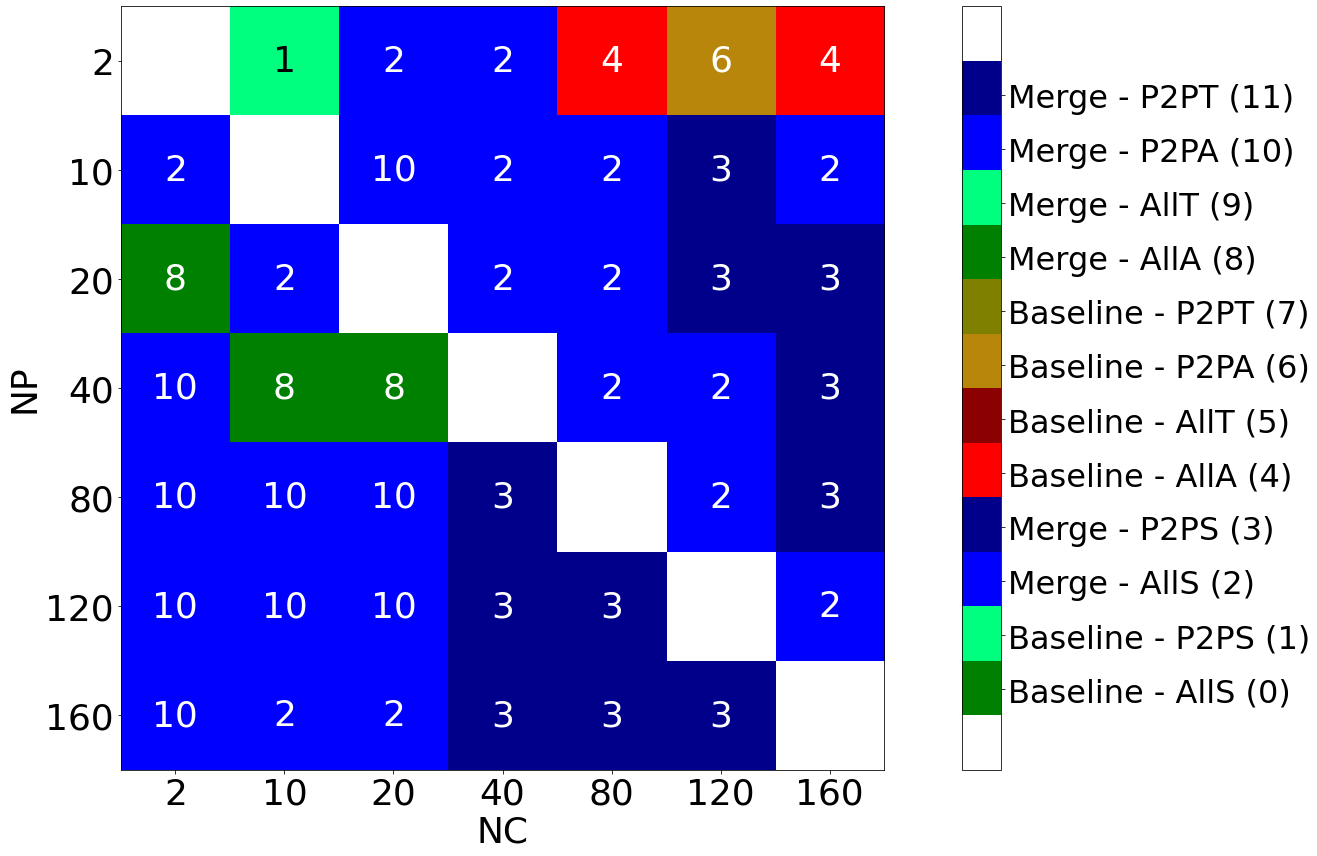

In [128]:
#Crea un heatmap teniendo en cuenta los colores anteriores
f=plt.figure(figsize=(24, 12))
ax=f.add_subplot(111)

myColors = (colors.to_rgba("white"),colors.to_rgba("green"), colors.to_rgba("springgreen"),colors.to_rgba("blue"),colors.to_rgba("darkblue"),
            colors.to_rgba("red"),colors.to_rgba("darkred"),colors.to_rgba("darkgoldenrod"),colors.to_rgba("olive"),
            colors.to_rgba("green"), colors.to_rgba("springgreen"),colors.to_rgba("blue"),colors.to_rgba("darkblue"),colors.to_rgba("white"))
cmap = LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))

im = ax.imshow(heatmap,cmap=cmap,interpolation='nearest')

# Loop over data dimensions and create text annotations.
used_aux=0
for i in range(len(processes)):
    for j in range(len(processes)):
        if i!=j:
            aux_color="white"
            if heatmap[i, j] == 1 or heatmap[i, j] == 9: # El 1 puede necesitar texto en negro
                aux_color="black"
            results_index = i*len(processes) +j-used_aux
            if len(results_str[results_index]) == 1:
                text = results_str[results_index][0]
                ax.text(j, i, text, ha="center", va="center", color=aux_color, fontsize=36)
            else:
                add_aux = 0.33
                for line in range(len(results_str[results_index])):
                    i_range = i - 0.5 + add_aux
                    ax.text(j, i_range, results_str[results_index][line],
                            ha="center", va="center", color=aux_color, fontsize=36)
                    add_aux+=0.33
        else:
            used_aux+=1

ax.set_ylabel("NP", fontsize=36)
ax.set_xlabel("NC", fontsize=36)

ax.set_xticklabels(['']+processes, fontsize=36)
ax.set_yticklabels(['']+processes, fontsize=36)


labelsMethods_aux = ['Baseline - AllS (0)', 'Baseline - P2PS (1)',
                    'Merge - AllS (2)','Merge - P2PS (3)',
                    'Baseline - AllA (4)', 'Baseline - AllT (5)','Baseline - P2PA (6)','Baseline - P2PT (7)',
                    'Merge - AllA (8)','Merge - AllT (9)','Merge - P2PA (10)','Merge - P2PT (11)']
colorbar=f.colorbar(im, ax=ax)
tick_bar = []
for i in range(len(used_config)):
    tick_bar.append(0.37 + i*0.92) #TE
colorbar.set_ticks(tick_bar) 
colorbar.set_ticklabels(labelsMethods_aux)
colorbar.ax.tick_params(labelsize=32)
#

f.tight_layout()
f.savefig("Images/Spawn/Heatmap_"+tipo+".png", format="png")

In [94]:
aux_array = [0] * len(results)
for index in range(len(results)):
    aux_array[index] = results[index][0]
aux_results, aux_counts = np.unique(aux_array, return_counts = True)
print(aux_results)
print(aux_counts)


[ 1  2  3  4  6  8 10]
[ 1 21  8  1  2  2  7]


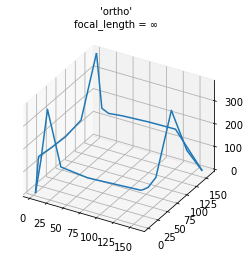

In [114]:
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': '3d'})

# Get the test data
#X, Y, Z = axes3d.get_test_data(0.05)

aux = grouped_aggG.loc[u_sols[0],'T_total']
Z = [None] * len(processes)
X, Y = np.meshgrid(processes, processes)
removed_index = 0
for i in range(len(processes)):
    Z[i] = [0] * len(processes)
    for j in range(len(processes)):
        if i!=j:
            real_i = i - removed_index
            real_j = j - removed_index
            Z[i][j] = aux.values[real_i*len(processes)+real_j]
        else:
            Z[i][j] = 0
            removed_index += 1  
Z = np.array(Z)

ax.plot_wireframe(X, Y, Z, rstride=20, cstride=10)
ax.set_proj_type('ortho')  # FOV = 0 deg
ax.set_title("'ortho'\nfocal_length = ∞", fontsize=10)
plt.show()

In [ ]:
import dask.dataframe as dd
ddf = dd.from_pandas(dfL[(dfL.Asynch_Iters == False)], npartitions=10)
group = ddf.groupby('NP')['T_iter']
grouped_aggLSynch = group.agg(['mean'])
grouped_aggLSynch = grouped_aggLSynch.rename(columns={'mean':'T_iter'}) 
grouped_aggLSynch = grouped_aggLSynch.compute()

In [41]:
a = (4, 3, 5, 6)
b = (4, 3, 5, 6)
d = (4, 3, 5, 7)
c = (3, 4, 5, 6)

print(a[1:]==b[1:])
print(a[1:]==c[1:])
print(a[1:])

True
False
(3, 5, 6)


In [19]:
a = [2, 3]
a.pop(0)
print(a)

[3]
